# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


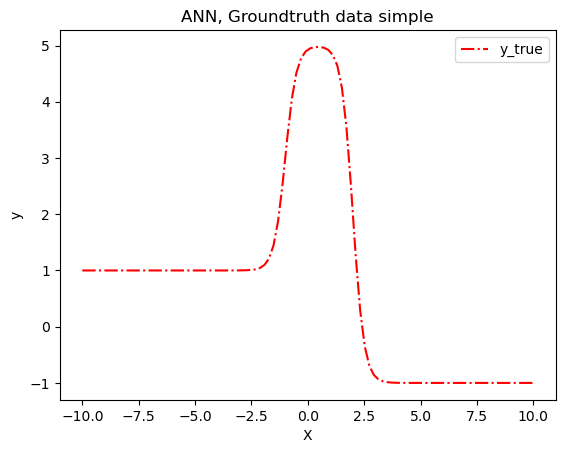

In [66]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y") 
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [67]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


Coefs and intecepts
Weights: [[-2.00016761 -1.99959698]]
Bias: [-2.00012895  3.99917298]

Weights: [[-2.00010232]
 [ 3.00012361]]
Bias: [-4.8644416e-05]

OK


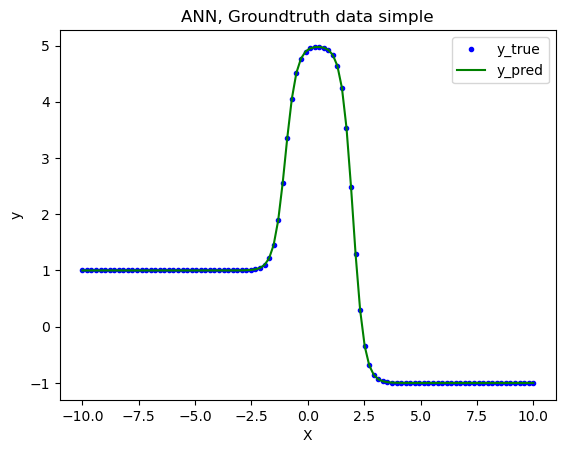

In [68]:
plt.plot(X, y_true, "b.")
plt.plot(X, y_pred, "g-")
plt.legend(["y_true", "y_pred"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")

print("Coefs and intecepts")
print(f"Weights: {mlp.coefs_[0]}")
print(f"Bias: {mlp.intercepts_[0]}\n")
print(f"Weights: {mlp.coefs_[1]}")
print(f"Bias: {mlp.intercepts_[1]}")   
        
print("\nOK")

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [69]:
# TODO: extract and print all coefficients..

#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [70]:
# The following weights and biases has been extracted from the mlp model from Qa
w00 = mlp.coefs_[0][0][0]
w01 = mlp.coefs_[0][0][1]

b00 = mlp.intercepts_[0][0]
b01 = mlp.intercepts_[0][1]

w10 = mlp.coefs_[1][0][0]
w11 = mlp.coefs_[1][1][0]

b10 = mlp.intercepts_[1][0]

# This is a generic mathematical formula of our ANN 
# ! ITS FROM GEMINI
#y = w1 * tanh(w2 * x + b1) + w3 * tanh(w4 * x + b2) + b3

# This is our specific mathematical 
y_math = w00 * np.tanh(w01 * X + b00) + w10 * np.tanh(w11 * X + b01) + b10


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

Text(0.5, 1.0, 'ANN, Groundtruth data simple')

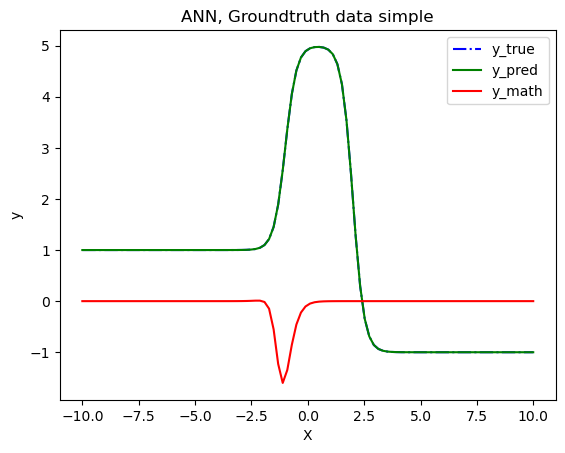

In [71]:
plt.plot(X, y_true, "b-.")
plt.plot(X, y_pred, "g-")
plt.plot(X, y_math, "r-")
plt.legend(["y_true", "y_pred", "y_math"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")

#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

Text(0.5, 1.0, 'ANN, y_math split up')

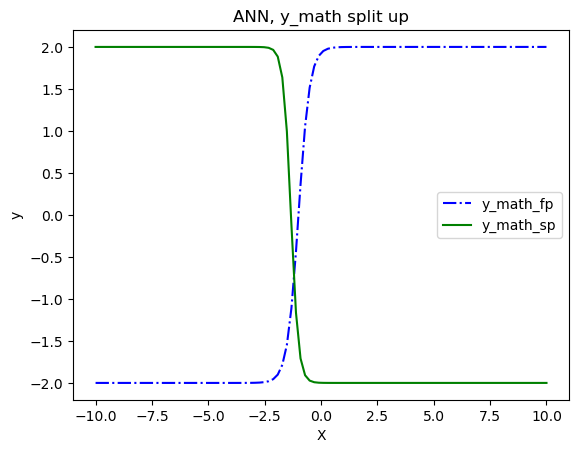

In [72]:
y_math_first_part = w00 * np.tanh(w01 * X + b00)
y_math_second_part = w10 * np.tanh(w11 * X + b01)

plt.plot(X, y_math_first_part, "b-.")
plt.plot(X, y_math_second_part, "g-")
plt.legend(["y_math_fp", "y_math_sp"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, y_math split up")

#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

AssertionError: TODO: instantiate and train an MLP on the sinc data..

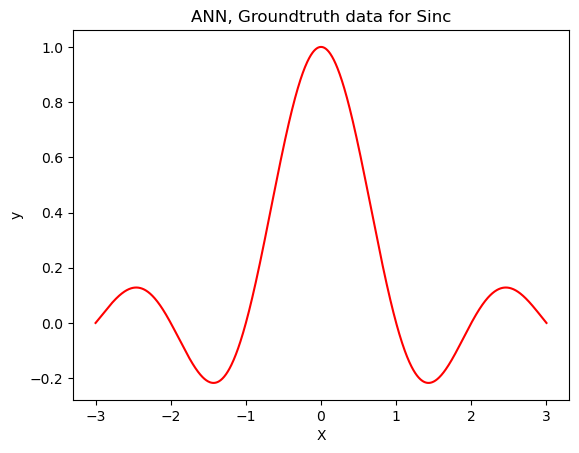

In [73]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

# TODO:
assert False, "TODO: instantiate and train an MLP on the sinc data.."

####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [ ]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.